<a href="https://colab.research.google.com/github/marmutgram/Datascienceclass/blob/main/handling_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [87]:
path='/content/drive/MyDrive/DataSource/Titanic_train.xlsx'

loading_data_fronSC=pd.read_excel(path)

#data frame
df=pd.DataFrame(loading_data_fronSC)

df.tail(5)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.775,NaN,S,NaN,NaN,NaN,0
849,425,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.000,NaN,S,NaN,19.0,"Bronx, NY",0


In [88]:
df['pclass'].value_counts()

3    477
1    206
2    167
Name: pclass, dtype: int64

In [89]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             173
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           677 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [91]:
df.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.000000,677.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.318824,29.476243,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.838277,14.595630,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.000000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.000000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.000000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


Gunakan jenis kurva kde menggunakan matplot

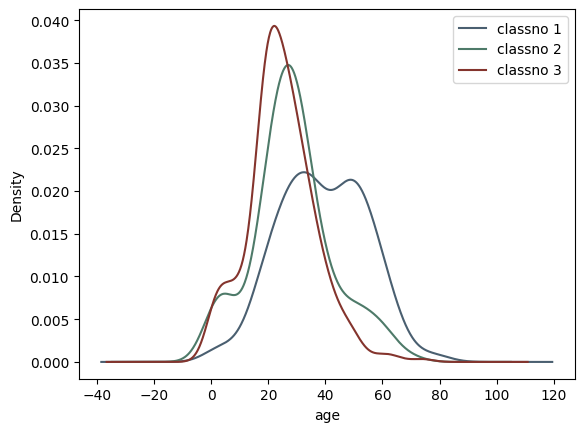

In [93]:
#menggambar kurva untuk AGE
#before missing filling age with mean in each pclass

df[df.pclass==1].age.plot(kind='kde',color='#4a5f70',label='classno 1')
df[df.pclass==2].age.plot(kind='kde',color='#4e7a69',label='classno 2')
df[df.pclass==3].age.plot(kind='kde',color='#84342d',label='classno 3')

plt.xlabel('age')
plt.legend(loc='best')
plt.show()

Alternatif bentuk kurva menggunakan seaborn

<Axes: xlabel='age', ylabel='Density'>

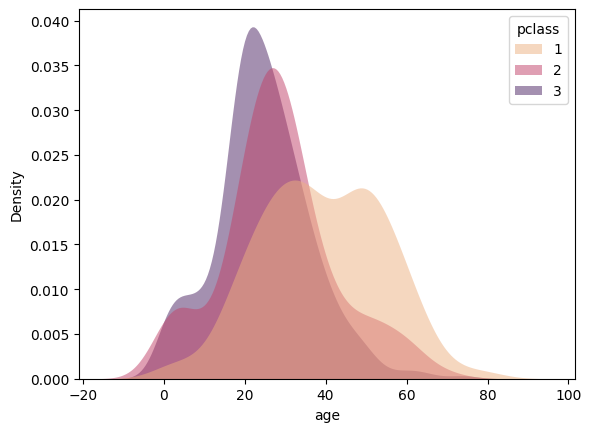

In [92]:
sns.kdeplot(
   data=df, x="age", hue=df.pclass,
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0
)

In [94]:
#mengisi null value pada age

def filling_missing_age(dataset):
  for i in range(1,4):
    val_age=dataset[dataset['pclass']==i]['age'].mean()
    dataset.loc[(dataset['pclass']==i)&(dataset['age'].isnull()),'age']=val_age
  return dataset

df=filling_missing_age(df)

Gunakan jenis kurva kde menggunakan matplot

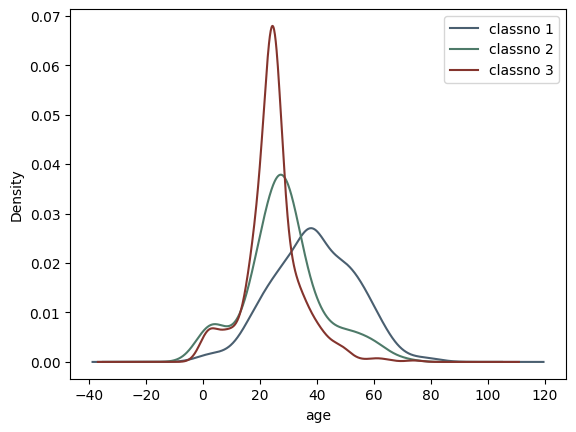

In [96]:
#menggambar kurva untuk AGE
#after missing filling age with mean in each pclass

df[df.pclass==1].age.plot(kind='kde',color='#4a5f70',label='classno 1')
df[df.pclass==2].age.plot(kind='kde',color='#4e7a69',label='classno 2')
df[df.pclass==3].age.plot(kind='kde',color='#84342d',label='classno 3')

plt.xlabel('age')
plt.legend(loc='best')
plt.show()

Alternatif kurva dengan menggunakan seaborn

<Axes: xlabel='age', ylabel='Density'>

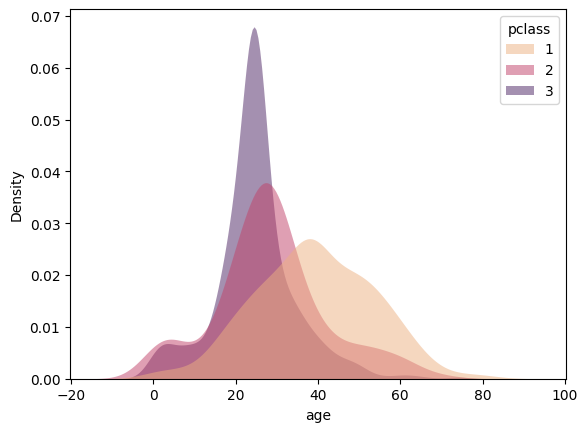

In [95]:
sns.kdeplot(
   data=df, x="age", hue=df.pclass,
   fill=True, common_norm=False, palette="flare",
   alpha=.5, linewidth=0
)

In [97]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64